In [1]:
import numpy as np
from keras.models import load_model
import glob
import imageio
import IPython
import matplotlib.pyplot as plt
# MacOS matplotlib kernel issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.
/Users/tejas/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tejas/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tejas/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tejas/anaconda3/lib/python3.7/site-packages/tenso

In [2]:
generator_model = load_model('./TFDigitModels/GENmodel_100.h5')








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
def save_fig(predicted):
    # Only 32 images will be printed
    if predicted.shape[0] > 32:
        predicted = predicted[:32]
    num_images = predicted.shape[0]
    fig = plt.figure(figsize=(15,7))
    columns = 8
    rows = np.ceil(num_images / columns)
    for i in range(num_images):
        fig.add_subplot(rows, columns, i+1)
        my_image = predicted[i]
        # Denormalize Image
        my_image = ((my_image + 1) * 127.5) / 255
        plt.imshow(my_image[:, :, 0], cmap='gray')
#     plt.savefig('./GeneratedDigits/image_'+step+'.jpg', bbox_inches = 'tight', pad_inches = 0.1)
    plt.show(block=True)
    plt.close('all')

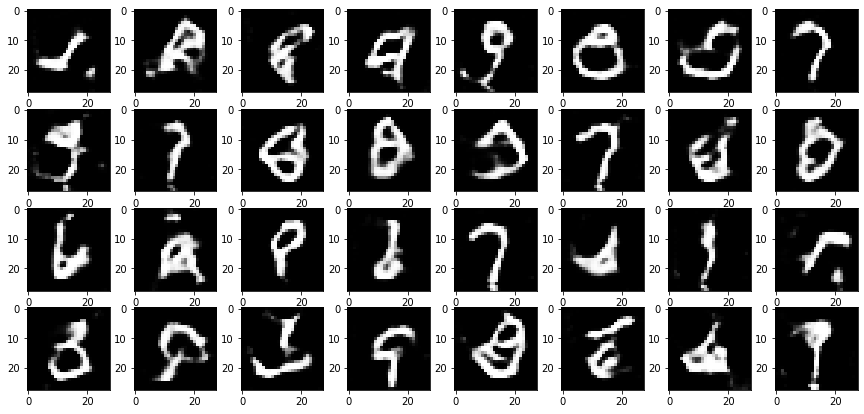

In [4]:
gen_shape = tuple(generator_model.input.get_shape().as_list()[1:])
gen_noise = np.random.normal(loc=0, scale=1, size=(32,)+gen_shape)
created_faces = generator_model.predict(gen_noise)
save_fig(created_faces)

In [5]:
anim_file = 'tf_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./TFGeneratedDigits/image*.jpg')
    filenames = sorted(filenames)
    last = -1
    for i,filename in enumerate(filenames):
        image = imageio.imread(filename)
        writer.append_data(image)

<img src="./tf_dcgan.gif">

In [6]:
generator_model = load_model('./DigitModels/GENmodel_150.h5')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



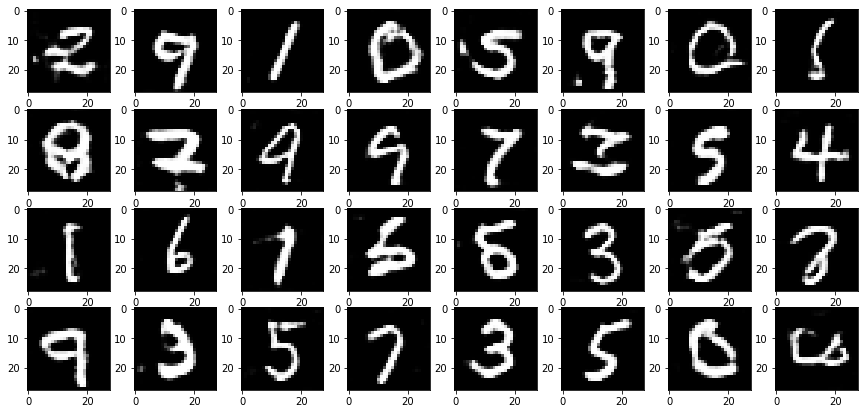

In [7]:
gen_shape = tuple(generator_model.input.get_shape().as_list()[1:])
gen_noise = np.random.normal(loc=0, scale=1, size=(32,)+gen_shape)
created_faces = generator_model.predict(gen_noise)
save_fig(created_faces)

In [8]:
anim_file = 'imp_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./GeneratedDigits/image*.jpg')
    filenames = sorted(filenames)
    filenames = filenames[0:151]
    last = -1
    for i,filename in enumerate(filenames):
        image = imageio.imread(filename)
        writer.append_data(image)

<img src="./imp_dcgan.gif">